<a href="https://colab.research.google.com/github/duskovesic/Machine-Learning/blob/main/06_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uvod

U ovoj svesci kreiran je autoenkoder. Koristi se baza podataka „MNIST“, s tim da je slikama iz baze dodat šum. Prvi deo autoenkodera je enkoder, koji prihvata slike sa šumom i redukuje ih u latentni prostoj manje dimenzije. Drugi deo je dekoder koji prihvata latantne reprezentacije i regeneriše ih u početni oblik.

#Importovanje i setapovanje

In [ ]:
import numpy as np

from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dropout, Flatten, Dense, Reshape, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

from keras import backend as B
from keras import utils


#Učitavanje i obrada podataka

In [ ]:
(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

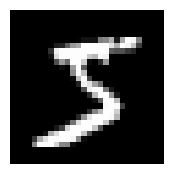

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
im_format = B.image_data_format()
im_format

'channels_last'

In [ ]:
img_size = X_train.shape[1]
img_size

28

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

#Dodavanje šuma na slike

In [ ]:
np.random.seed(1234)
X_train_noisy = X_train + np.random.normal(loc=0.6, scale=0.6, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = X_test +np.random.normal(loc=0.6, scale=0.6, size=X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

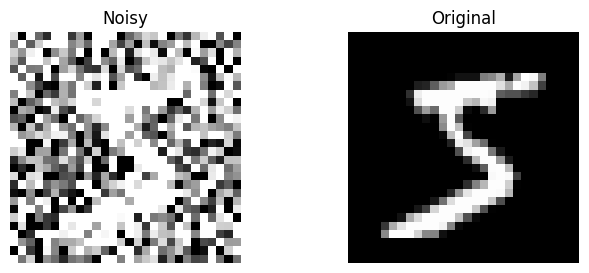

In [ ]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.title("Noisy")
plt.imshow(X_train_noisy[0], cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Original")
plt.imshow(X_train[0], cmap="gray")
plt.axis("off")

plt.show()

#Kreiranje i treniranje modela

In [ ]:
input_shape = X_train[0].shape
ker_size = (3, 3)
strides = (2, 2)
latent_dim = 16
input_shape

(28, 28, 1)

In [ ]:
input_img = Input(shape=(input_shape), name="Enkoder_ulaz")
x = Conv2D(filters=32, kernel_size=ker_size, strides=strides, padding="same", activation="relu", name="Konvolucija_1")(input_img)
x = Conv2D(filters=64, kernel_size=ker_size, strides=strides, padding="same", activation="relu", name="Konvolucija_2")(x)
shape_before_flat = x.shape
x = Flatten()(x)
latent_vector = Dense(units=latent_dim, name="Latentni_vektor")(x)
encoder = Model(inputs=input_img, outputs=latent_vector, name="Enkoder")
encoder.summary()

Model: "Enkoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Enkoder_ulaz (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 Konvolucija_1 (Conv2D)      (None, 14, 14, 32)        320       
                                                                 
 Konvolucija_2 (Conv2D)      (None, 7, 7, 64)          18496     
                                                                 
 flatten_6 (Flatten)         (None, 3136)              0         
                                                                 
 Latentni_vektor (Dense)     (None, 16)                50192     
                                                                 
Total params: 69008 (269.56 KB)
Trainable params: 69008 (269.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
shape_before_flat

TensorShape([None, 7, 7, 64])

In [ ]:
decoder_input = Input(shape=(latent_dim,), name="Dekoder_ulaz")
x = Dense(units = shape_before_flat[1]*shape_before_flat[2]*shape_before_flat[3], name="Latentni_vektor")(decoder_input)
x = Reshape(shape_before_flat[1:])(x)
x = Conv2DTranspose(filters=64, kernel_size=ker_size, strides=strides, padding="same", activation="relu", name="Konvolucija_2_na_-1")(x)
x = Conv2DTranspose(filters=32, kernel_size=ker_size, strides=strides, padding="same", activation="relu", name="Konvolucija_1_na_-1")(x)
output = Conv2DTranspose(filters=1, kernel_size=ker_size, strides=(1,1), padding="same", activation="sigmoid", name="Vracanje_dimenzionalnosti")(x)
decoder = Model(inputs=decoder_input, outputs=output, name="Dekoder")
decoder.summary()

Model: "Dekoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dekoder_ulaz (InputLayer)   [(None, 16)]              0         
                                                                 
 Latentni_vektor (Dense)     (None, 3136)              53312     
                                                                 
 reshape_6 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 Konvolucija_2_na_-1 (Conv2  (None, 14, 14, 64)        36928     
 DTranspose)                                                     
                                                                 
 Konvolucija_1_na_-1 (Conv2  (None, 28, 28, 32)        18464     
 DTranspose)                                                     
                                                                 
 Vracanje_dimenzionalnosti   (None, 28, 28, 1)         289 

In [ ]:
autoencoder = Model(inputs=input_img, outputs=decoder(encoder(input_img)), name="Autoenkoder")
autoencoder.summary()

Model: "Autoenkoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Enkoder_ulaz (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 Enkoder (Functional)        (None, 16)                69008     
                                                                 
 Dekoder (Functional)        (None, 28, 28, 1)         108993    
                                                                 
Total params: 178001 (695.32 KB)
Trainable params: 178001 (695.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer="adam", loss="mse")

In [ ]:
batch_size = 128
num_ep = 40
early_stop = EarlyStopping(monitor="val_loss", patience=2, verbose=1)

In [ ]:
history = autoencoder.fit(X_train_noisy, X_train, batch_size=batch_size, epochs=num_ep, validation_split=0.2, verbose=1, callbacks=early_stop)

Epoch 1/40
375/375 [==============================] - 72s 186ms/step - loss: 0.0692 - val_loss: 0.0524
Epoch 2/40
375/375 [==============================] - 68s 180ms/step - loss: 0.0356 - val_loss: 0.0288
Epoch 3/40
375/375 [==============================] - 66s 176ms/step - loss: 0.0268 - val_loss: 0.0255
Epoch 4/40
375/375 [==============================] - 69s 185ms/step - loss: 0.0243 - val_loss: 0.0238
Epoch 5/40
375/375 [==============================] - 77s 206ms/step - loss: 0.0229 - val_loss: 0.0227
Epoch 6/40
375/375 [==============================] - 73s 196ms/step - loss: 0.0220 - val_loss: 0.0222
Epoch 7/40
375/375 [==============================] - 69s 183ms/step - loss: 0.0214 - val_loss: 0.0218
Epoch 8/40
375/375 [==============================] - 68s 180ms/step - loss: 0.0209 - val_loss: 0.0216
Epoch 9/40
375/375 [==============================] - 67s 179ms/step - loss: 0.0205 - val_loss: 0.0215
Epoch 10/40
375/375 [==============================] - 67s 178ms/step - l

In [ ]:
y_predict = autoencoder.predict(X_test_noisy)

313/313 [==============================] - 5s 15ms/step


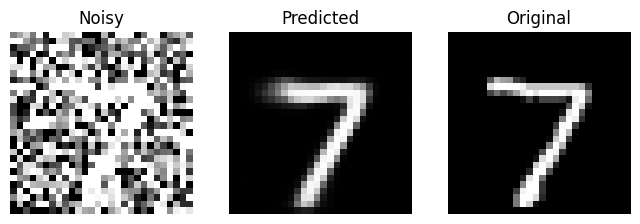

In [ ]:
plt.figure(figsize=(8, 3))

i=0

plt.subplot(1, 3, 1)
plt.title("Noisy")
plt.imshow(X_test_noisy[i], cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Predicted")
plt.imshow(y_predict[i], cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Original")
plt.imshow(X_test[i], cmap="gray")
plt.axis("off")

plt.show()